## Slug Test for Unconfined Aquifer
**This test is taken from examples of AQTESOLV.**

In [1]:
%matplotlib inline
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Set background parameters:

In [2]:
rw = 0.127 # well radius
rc = 0.0508 # well casing radius
L = 4.20624 # screen length
b = -9.9274 # aquifer thickness
zt = -0.1433 # depth to top of the screen
H0 = 0.4511 # initial displacement in the well
zb = zt - L # bottom of the screen

Slug:

In [3]:
Q = np.pi * rc ** 2 * H0
print('Slug:', round(Q, 5), 'm^3')

Slug: 0.00366 m^3


Load data:

In [4]:
data = np.loadtxt('data/falling_head.txt', skiprows = 2)
t = data[:, 0] / 60 / 60 / 24 #convert time from seconds to days
h = (10 - data[:, 1]) * 0.3048 #convert drawdown from ft to meters

Creat conceptual model:

In [5]:
ml = Model3D(kaq=10, z=[0, zt, zb, b], Saq=1e-4, kzoverkh=1, \
             tmin=1e-5, tmax=0.01, phreatictop=True)
w = Well(ml, xw=0, yw=0, rw=rw, tsandQ=[(0, -Q)], layers=1, wbstype='slug')
ml.solve()

self.neq  1
solution complete


In [6]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0_2', initial=50, pmin=0)
ca.set_parameter(name='Saq0_2', initial=1e-4, pmin=0)
#ca.set_parameter_by_reference(name='rc', parameter=w.rc, initial=0.05)
#ca.set_parameter_by_reference(name='res', parameter=w.res, initial=0.1)
ca.series(name='obs', x=0, y=0, layer=1, t=t, h=h)
ca.fit(report = True)

.............................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 106
    # data points      = 27
    # variables        = 2
    chi-square         = 0.34052586
    reduced chi-square = 0.01362103
    Akaike info crit   = -114.073729
    Bayesian info crit = -111.482055
[[Variables]]
    kaq0_2:  0.16250273 +/- 0.03421034 (21.05%) (init = 50)
    Saq0_2:  0.17476449 +/- 0.03661437 (20.95%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_2, Saq0_2) =  1.000


In [7]:
display(ca.parameters)
print('RMSE:', ca.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_2,0.162503,0.034210,21.0522,0,inf,50,"[0.16250273313214247, 0.16250273313214247, 0.1..."
Saq0_2,0.174764,0.036614,20.9507,0,inf,0.0001,"[0.17476448700526315, 0.17476448700526315, 0.1..."


RMSE: 0.11230346830391386


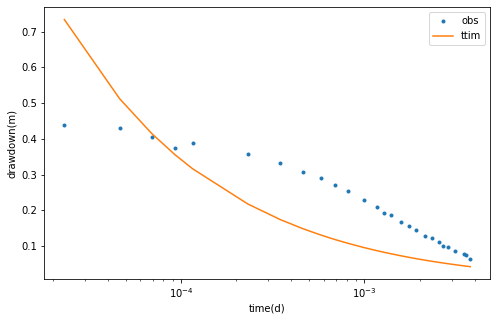

In [8]:
hm = ml.head(0, 0, t, layers = 1)
plt.figure(figsize = (8, 5))
plt.semilogx(t, h, '.', label = 'obs')
plt.semilogx(t, hm[0], label = 'ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Try adding wellbore storage:

In [9]:
ml_0 = Model3D(kaq=10, z=[0, zt, zb, b], Saq=1e-4, kzoverkh=1, \
             tmin=1e-5, tmax=0.01, phreatictop=True)
w_0 = Well(ml_0, xw=0, yw=0, rw=rw, rc=0.1, tsandQ=[(0, -Q)], layers=1, wbstype='slug')
ml_0.solve()

self.neq  1
solution complete


In [10]:
ca_0 = Calibrate(ml_0)
ca_0.set_parameter(name='kaq0_2', initial=50, pmin=0)
ca_0.set_parameter(name='Saq0_2', initial=1e-4, pmin=0)
ca_0.set_parameter_by_reference(name='rc', parameter=w_0.rc, initial=0.5)
#ca_0.set_parameter_by_reference(name='res', parameter=w_0.res, initial=0.1)
ca_0.series(name='obs', x=0, y=0, layer=1, t=t, h=h)
ca_0.fit(report = True)

.........................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 27
    # variables        = 3
    chi-square         = 0.00101518
    reduced chi-square = 4.2299e-05
    Akaike info crit   = -269.090253
    Bayesian info crit = -265.202743
[[Variables]]
    kaq0_2:  0.55169973 +/- 0.03585030 (6.50%) (init = 50)
    Saq0_2:  2.3073e-04 +/- 1.0763e-04 (46.65%) (init = 0.0001)
    rc:      0.05108665 +/- 3.2338e-04 (0.63%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_2, Saq0_2) = -0.980
    C(Saq0_2, rc)     = -0.830
    C(kaq0_2, rc)     =  0.779


In [11]:
display(ca_0.parameters)
print('RMSE:', ca_0.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_2,0.5517,0.035850,6.49815,0,inf,50,"[0.5516997257771601, 0.5516997257771601, 0.551..."
Saq0_2,0.000230733,0.000108,46.6486,0,inf,0.0001,"[0.00023073323964761805, 0.0002307332396476180..."
rc,0.0510866,0.000323,0.632998,-inf,inf,0.5,[0.051086649153707316]


RMSE: 0.0061318182911490405


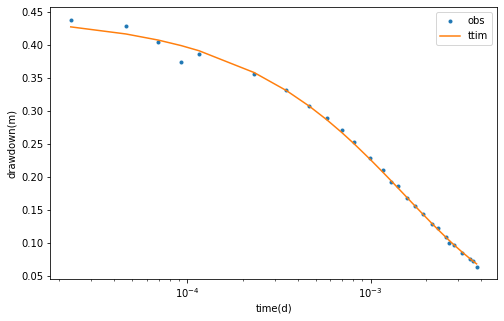

In [12]:
hm_0 = ml_0.head(0, 0, t, layers = 1)
plt.figure(figsize = (8, 5))
plt.semilogx(t, h, '.', label = 'obs')
plt.semilogx(t, hm_0[0], label = 'ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Add both wellbore storage and well resistance of screen: 

In [13]:
ml_2 = Model3D(kaq=10, z=[0, zt, zb, b], Saq=1e-4, kzoverkh=1, \
             tmin=1e-5, tmax=0.01, phreatictop=True)
w_2 = Well(ml_2, xw=0, yw=0, rw=rw, rc=0.1, res=0.1, \
           tsandQ=[(0, -Q)], layers=1, wbstype='slug')
ml_2.solve()

self.neq  1
solution complete


In [14]:
ca_2 = Calibrate(ml_2)
ca_2.set_parameter(name='kaq0_2', initial=50, pmin=0)
ca_2.set_parameter(name='Saq0_2', initial=1e-4, pmin=0)
ca_2.set_parameter_by_reference(name='rc', parameter=w_2.rc, initial=0.5)
ca_2.set_parameter_by_reference(name='res', parameter=w_2.res, initial=0.1)
ca_2.series(name='obs', x=0, y=0, layer=1, t=t, h=h)
ca_2.fit(report = True)

...........................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 344
    # data points      = 27
    # variables        = 4
    chi-square         = 6.5965e-04
    reduced chi-square = 2.8680e-05
    Akaike info crit   = -278.730355
    Bayesian info crit = -273.547007
[[Variables]]
    kaq0_2:  0.71559407 +/- 0.08981006 (12.55%) (init = 50)
    Saq0_2:  5.5370e-06 +/- 1.5022e-05 (271.29%) (init = 0.0001)
    rc:      0.06270278 +/- 0.00924438 (14.74%) (init = 0.5)
    res:    -0.18723304 +/- 0.13996325 (74.75%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(rc, res)        = -1.000
    C(ka

In [15]:
display(ca_2.parameters)
print('RMSE:', ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_2,0.715594,0.089810,12.5504,0,inf,50,"[0.7155940671091383, 0.7155940671091383, 0.715..."
Saq0_2,5.53699e-06,0.000015,271.294,0,inf,0.0001,"[5.536986301457603e-06, 5.536986301457603e-06,..."
rc,0.0627028,0.009244,14.7432,-inf,inf,0.5,[0.0627027841012748]
res,-0.187233,0.139963,74.7535,-inf,inf,0.1,[-0.1872330436595833]


RMSE: 0.004942809484746552


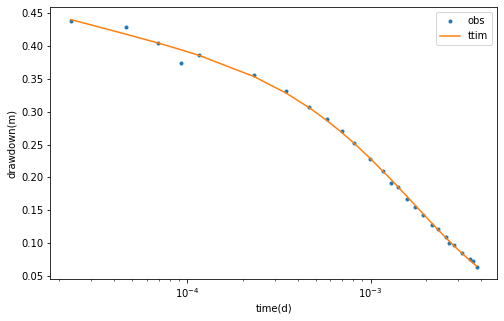

In [16]:
hm_2 = ml_2.head(0, 0, t, layers = 1)
plt.figure(figsize = (8, 5))
plt.semilogx(t, h, '.', label = 'obs')
plt.semilogx(t, hm_2[0], label = 'ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend();

Conceptual model with multilyaer:

In [17]:
#Calculate elevations of each layer. Thickness of each layer is set to be 0.5 m.
z0 = np.arange(zt, zb, -0.5)
z1 = np.arange(zb, b, -0.5)
zlay = np.append(z0, z1)
zlay = np.append(zlay, b)
zlay = np.insert(zlay, 0, 0)
nlay = len(zlay) - 1 #number of layers
Saq_1 = 1e-4 * np.ones(nlay)
Saq_1[0] = 0.1

In [18]:
ml_3 = Model3D(kaq=10, z=zlay, Saq=Saq_1, kzoverkh=1, \
             tmin=1e-5, tmax=0.01, phreatictop=True)
w_3 = Well(ml_3, xw=0, yw=0, rw=rw, tsandQ=[(0, -Q)], layers=1, rc=0.1, wbstype='slug')
ml_3.solve()

self.neq  1
solution complete


In [19]:
ca_3 = Calibrate(ml_3)
ca_3.set_parameter(name='kaq0_21', initial=10, pmin=0)
ca_3.set_parameter(name='Saq0_21', initial=1e-4, pmin=0)
ca_3.set_parameter_by_reference(name='rc', parameter=w_3.rc, initial=0.1)
ca_3.set_parameter_by_reference(name='res', parameter=w_3.res, initial=0.1)
ca_3.series(name='obs', x=0, y=0, layer=1, t=t, h=h)
ca_3.fit(report = True)

.............................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 27
    # variables        = 4
    chi-square         = 7.1509e-04
    reduced chi-square = 3.1091e-05
    Akaike info crit   = -276.551388
    Bayesian info crit = -271.368041
[[Variables]]
    kaq0_21:  2.18047790 +/- 0.36108938 (16.56%) (init = 10)
    Saq0_21:  0.00883447 +/- 0.01361276 (154.09%) (init = 0.0001)
    rc:       0.05338648 +/- 0.00406649 (7.62%) (init = 0.1)
    res:     -0.00495299 +/- 0.00700775 (141.49%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(rc, res)          = -0.998
    C(kaq0_21, Saq0_21) = -0.997
    C(Saq0_21, rc)      = -0.983
    C(Saq0_21, res)     =  0.975
    C(kaq0_21, rc)      =  0.971
    C(kaq0_21, res)     = -0.961


In [20]:
display(ca_3.parameters)
print('RMSE:', ca_3.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_21,2.18048,0.361089,16.5601,0,inf,10,"[2.1804778970342498, 2.1804778970342498, 2.180..."
Saq0_21,0.00883447,0.013613,154.087,0,inf,0.0001,"[0.00883447297940898, 0.00883447297940898, 0.0..."
rc,0.0533865,0.004066,7.61709,-inf,inf,0.1,[0.05338648055835486]
res,-0.00495299,0.007008,141.485,-inf,inf,0.1,[-0.004952985721054632]


RMSE: 0.005146336604742368


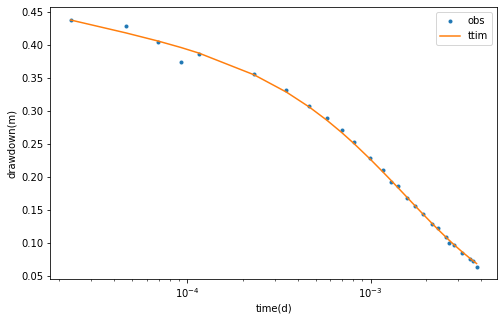

In [21]:
hm_3 = ml_3.head(0, 0, t, layers=1)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h, '.', label = 'obs')
plt.semilogx(t, hm_3[0], label = 'ttim')
plt.xlabel('time(d)')
plt.ylabel('drawdown(m)')
plt.legend(loc = 'best');

## Summary of values presented in AQTESOLV:

In [25]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]', 'rc', 'res'], \
                index=['AQTESOLV', 'ttim three-layer', 'ttim multilayer'])
a = [2.616, 7.894E-5, '-', '-']
t.loc['AQTESOLV'] = a
t.loc['ttim three-layer'] = ca_2.parameters['optimal'].values
t.loc['ttim multilayer'] = ca_3.parameters['optimal'].values
rmse = [0.001197, round(ca_2.rmse(), 6), round(ca_3.rmse())]
t['RMSE'] = rmse
t

,k [m/d],Ss [1/m],rc,res,RMSE
AQTESOLV,2.616,7.894e-05,-,-,0.001197
ttim three-layer,0.715594,5.53699e-06,0.0627028,-0.187233,0.004943
ttim multilayer,2.18048,0.00883447,0.0533865,-0.00495299,0.000000
